In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_and_crop_handwriting(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image at {image_path}")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    height, width = image.shape[:2]
    center_x = width // 2
    center_y = height // 2
    max_offset = -1
    max_offset_contour = None

    for contour in contours:
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        offset = np.sqrt((center_x - cX) ** 2 + (center_y - cY) ** 2)

        if offset > max_offset:
            max_offset = offset
            max_offset_contour = contour

    if max_offset_contour is not None:
        x, y, w, h = cv2.boundingRect(max_offset_contour)

        aspect_ratio = float(w) / h

        if aspect_ratio > 1:
            y_padding = int((w - h) / 2)
            x_padding = 0
        else:
            x_padding = int((h - w) / 2)
            y_padding = 0

        x -= x_padding
        w += 2 * x_padding
        y -= y_padding
        h += 2 * y_padding

        x = max(x, 0)
        w = min(w, width)
        y = max(y, 0)
        h = min(h, height)

        cropped_image = image[y:y + h, x:x + w]

        resized_image = cv2.resize(cropped_image, (28, 28))

        resized_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        resized_gray = resized_gray.reshape((28, 28, 1))

        return resized_gray

    else:
        print('No handwriting detected in the image.')
        return None


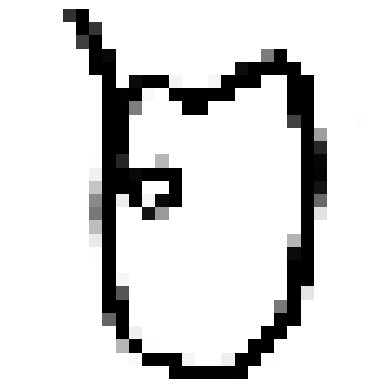

array([[[255],
        [255],
        [255],
        [255],
        [ 49],
        [  0],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        [255],
        [255],
        [  0],
        [ 54],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        [255],
        [255],
        [ 63],
        [  0],
        [255],
        [255],
        [255],
      

In [6]:
cropped_image = detect_and_crop_handwriting('data_test/2/2_20230603230346.PNG')
# data_test/2/2_20230603230346.PNG
# data_test/6/Untitled4_20230529220415.PNG
if cropped_image is not None:
    # Display the cropped image
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# cropped_image.shape
cropped_image